# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# 결측치 확인 및 처리
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

결측값 존재하지 않고, 0값도 없으므로 결측치 처리는 하지 않아도 될 것 같습니다.

In [ ]:
#중복값 확인
df.duplicated().sum()

0

중복값도 존재하지 않음을 확인했습니다.

<Axes: >

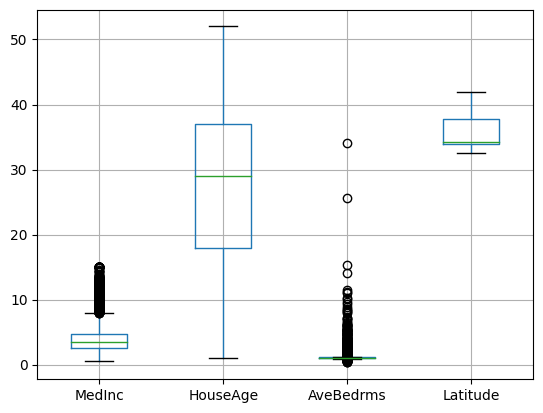

In [ ]:
# 이상치 탐지 (시각화, or scaler 사용)
df.boxplot(column=['MedInc','HouseAge','AveBedrms', 'Latitude'])
#AveBedrms 이상치 2개

<Axes: >

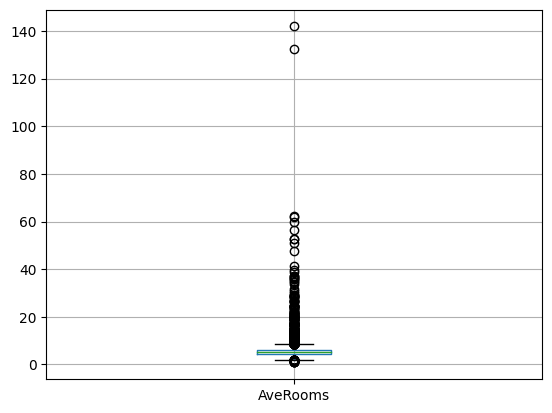

In [ ]:
df.boxplot(column=['AveRooms'])
#AveRooms 이상치 2개

<Axes: >

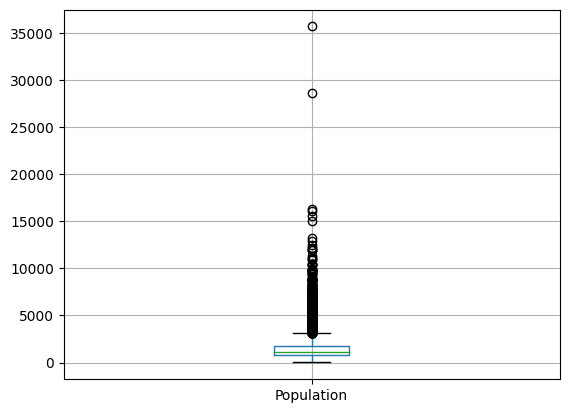

In [ ]:
df.boxplot(column=['Population'])
#Population 이상치 2개

[]

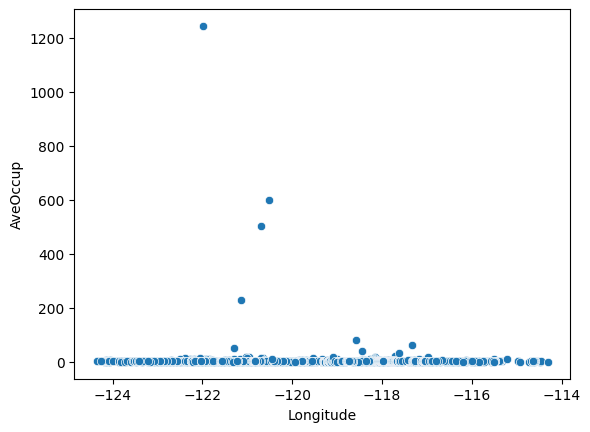

In [ ]:
#Longitude에 따른 AveOccup
sns.scatterplot(x=df['Longitude'], y=df['AveOccup'])
plt.plot()
#Longitude 이상치 없음, AveOccup 이상치 4개로 처리

[]

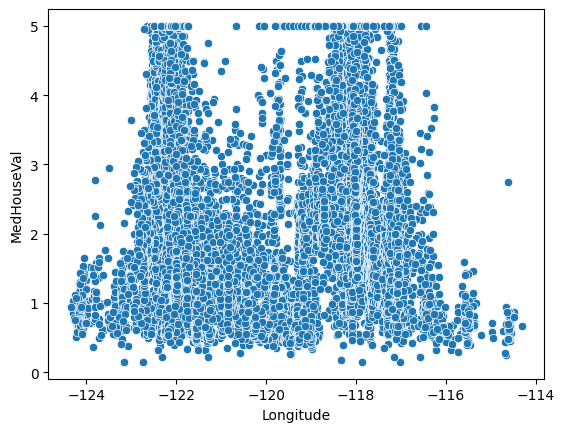

In [ ]:
#Longigude에 따른 MedHouseVal
sns.scatterplot(x=df['Longitude'], y=df['MedHouseVal'])
plt.plot()
#MedhouseVal 이상치 없음

이상치:
AveRooms-2개
AveBedrms-2개
Population-2개
AveOccup=4개


In [ ]:
df['AveRooms'].sort_values(ascending=False)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
            ...    
17820      1.130435
14818      1.130435
3126       1.000000
8219       0.888889
5916       0.846154
Name: AveRooms, Length: 20640, dtype: float64

In [ ]:
df['AveBedrms'].sort_values(ascending=False)

1979     34.066667
1914     25.636364
11862    15.312500
12447    14.111111
9676     11.410714
           ...    
3125      0.500000
12138     0.500000
12649     0.444444
13606     0.375000
20248     0.333333
Name: AveBedrms, Length: 20640, dtype: float64

In [ ]:
df['Population'].sort_values(ascending=False)

15360    35682.0
9880     28566.0
13139    16305.0
10309    16122.0
6057     15507.0
          ...   
18210        8.0
12286        8.0
3126         6.0
12458        5.0
5342         3.0
Name: Population, Length: 20640, dtype: float64

In [ ]:
df['AveOccup'].sort_values(ascending=False)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
            ...     
4623        1.066176
19427       1.060606
19522       0.970588
5342        0.750000
11849       0.692308
Name: AveOccup, Length: 20640, dtype: float64

In [ ]:
df.drop(df[df['AveRooms']>100].index, axis=0,inplace=True)

In [ ]:
df.drop(df[df['AveBedrms']>20].index,inplace=True)

In [ ]:
df.drop(df[df['Population']>20000].index,inplace=True)

In [ ]:
df.drop(df[df['AveOccup']>400].index, inplace=True)

In [ ]:
len(df)

20633

In [ ]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data =scaler.fit_transform(df[:])

In [ ]:
scaled_data

array([[0.53966842, 0.78431373, 0.09968115, ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.08756621, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.12085835, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.0707968 , ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.07281009, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.0715954 , ..., 0.72582359, 0.30976096,
        0.15340349]])

### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [ ]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입